In [2]:
import pandas as pd
from google.colab import drive
import numpy as np
import sklearn

drive = drive.mount('/content/drive/')

Mounted at /content/drive/


##Primeiros comandos
Acesso aos dados da planinha Everymind

---

*   Limpeza e remoção de algumas colunas que não vão ser necessárias na amplitude do nosso modelo
*   Troca dos valores nulo para zero e sua ordenação
*   Definição das variáveis "base", como a tabela Everymind da spreadsheet, e "reconhecimento", como a tabela Reconhecimento.

In [3]:
base = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind")
reconhecimento = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Reconhecimento")

base[base["Tipo Saida"].notna().sort_values()]
base = base.drop(['Nome Completo'], axis=1)
base = base.drop(['Etnia'], axis=1)

base.columns

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade'],
      dtype='object')

##Este código cria 4 novas colunas na tabela Everymind.


---


- Essas tabelas se referem ao hot encoding no qual será inserido o tempo (intervalos de 3, 6, 9 e 12 meses) para promoção ou reconhecimento dentro da empresa.

In [4]:
base['3 Meses >'] = 0
base['6 Meses >'] = 0
base['9 Meses >'] = 0
base['12 Meses >'] = 0

base.columns

Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', '3 Meses >',
       '6 Meses >', '9 Meses >', '12 Meses >'],
      dtype='object')

In [5]:
# base = base[['Matricula', 'Dt Admissao', 'Dt Saida', 'Tempo de casa', 'Tipo Saida', 'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', '3 Meses >', '6 Meses >', '9 Meses >', '12 Meses >']]

## Função que verifica, cria novas colunas e ás preenche


---


Tinhamos um grande problema em relação a tabela de reconhecimento e a tabela everymind, então criamos esse script para solucionar. O script pega cada matricula da tabela everymind e verifica se existe promoção ou merito na tabela "Reconhecimento", ele cria 4 colunas de tempo na tabela Everymind e vai preenchendo com base nos meritos e promoções da tabela de Reconhecimento.

In [6]:
from xlrd.book import display_cell_address
from datetime import date
import numpy as np
import math 

for item in base['Matricula']:
  for i in reconhecimento['Matricula']:
    if i == item:
      da = reconhecimento.iloc[int(i-1):int(i),3] #este código esta buscando um dado na tabela Reconhecimento
      date = reconhecimento.iloc[int(i-1):int(i),4]
      data3 = date - da
      data3 = data3.to_string()[3:-4].strip() #Transforma nossa data em string

      if data3 != 'ies([' and data3 != '':#Retira valores nulos ou ruídosos
        data3 = int(data3) #Transforma nossa data em um número inteiro. Ex: 200
      else: 
        data3 = 0
      mot = reconhecimento.iloc[int(i-1):int(i),7]
      motivo = mot.to_string(index=False)
      PROMOÇÃO = 2
      MÉRITO = 1
      if (data3 >= 90) and (int(data3) < 180):# os códigos abaixo estão preenchendo as novas colunas criadas com base na planilha Reconhecimento
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),14] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),14] = 1
          else:
            base.iat[int(item),14] = 0
      if (data3 > 180) and (int(data3) <= 273):
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),15] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),15] = 1
          else:
            base.iat[int(item),15] = 0
      if (data3 > 273) and (int(data3) <= 365):
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),16] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),16] = 1
          else:
            base.iat[int(item),16] = 0
      if (data3 > 365):
          if (motivo == 'PROMOÇÃO'):
            base.iat[int(item),17] = 2
          elif (motivo == 'MÉRITO'):
            base.iat[int(item),17] = 1
          else:
            base.iat[int(item),17] = 0


## Definição de Novas Tabelas

---

Criação da tabela Tempo de casa, que marca em dias quanto tempo a pessoa teve de empresa - para aquelas que têm data de saída, caso não, 0.

In [7]:
import datetime

# base['Dt Saida'] = base['Dt Saida'].fillna('-')
base['Dt Admissao'] = pd.to_datetime(base['Dt Admissao'])

houseTime = []

for ind in base.index:
  # if base['Dt Saida'][ind] != '-':
  if base['Dt Saida'][ind]:
    houseTime.append((base['Dt Saida'][ind] - base['Dt Admissao'][ind]).days)
  else:
    houseTime.append(0)

base['Tempo de casa'] = houseTime
base[base['Dt Saida'].notna()].sort_values('Tempo de casa', ascending=False)

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa
10,20.0,2009-04-01,2021-10-29,Pedido de Demissão,Dev Especialista,4406.965,1981-06-16,Masculino,Solteiro,Graduação,SP,Santos,AMS,41,0,0,0,0,4594.0
56,90.0,2015-05-04,2022-05-20,Pedido de Demissão,Dev Sr,4660.530,1993-06-10,Masculino,Solteiro,Graduação,SP,São Paulo,Analytics,29,0,0,0,0,2573.0
57,91.0,2015-09-21,2022-05-03,Pedido de Demissão,Arquiteto,7772.155,1985-10-25,Masculino,Casado,Graduação,SP,Santa Bárbara D'Oeste,Analytics,36,0,0,0,0,2416.0
3,7.0,2015-09-01,2021-10-29,Pedido de Demissão,Arquiteto,7000.000,1986-08-31,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0
5,9.0,2015-12-07,2021-11-12,Pedido de Demissão,Arquiteto,6500.000,1988-07-07,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,34,0,0,0,0,2167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,413.0,2022-03-16,2022-04-01,Rescisao Contrato Exp - Dispensa,Arquiteto,7250.000,1982-08-04,Masculino,Solteiro,Graduação,SP,São Paulo,Core & Industrias,40,0,0,0,0,16.0
433,489.0,2022-06-13,2022-06-20,Rescisao Contrato Exp - Pedido,Dev Especialista,6000.000,1977-02-10,Masculino,Casado,Pós Graduação,RS,Porto Alegre,Core & Industrias,45,0,0,0,0,7.0
470,526.0,2022-07-18,2022-07-25,Rescisao Contrato Exp - Pedido,Dev Jr,1500.000,1993-07-15,Feminino,Solteiro,Pós Graduação,PR,Colombo,Integration,29,0,0,0,0,7.0
159,205.0,2021-03-01,2021-03-05,Rescisao Contrato Exp - Pedido,Dev Pl,2250.000,1991-08-14,Masculino,Solteiro,Graduação,SP,São Paulo,Analytics,31,0,0,0,0,4.0


In [8]:
base.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [9]:
set(base["Escolaridade "].values)

{'Ensino Médio',
 'Ensino Médio Incompleto',
 'Graduação',
 'Mestrado',
 'Pós Graduação',
 'Superior incompleto',
 'Técnico'}

## Hot Encoding 
---

Atribuição de variáveis binárias, em colunas ('Tipo Saida', 'Cargo', 'Genero', 'Estado', 'Estado Civil', 'Escolaridade ') que estavam anteriormente em formato de string. 

Nossa intenção é segmentar e podem alimentar a inteligência com o melhor estado possível após o tratamento de dados, principalmente em atributos importantes para o andamento do projeto

### Legendas

##### Tipo de Saída
- 0: Dispensa sem justa causa
- 1: Pedido de demissão
- 2: Recisão contrato - Exp/Dispensa (Saiu em menos de 3 meses por opção da empresa)
- 3: Recisão contrato - Exp/Pedido (Saiu em menos de 3 meses por pedido)
- 4: Não saiu

##### Escolaridade
- 0: Ensino médio
- 1: Ensino médio incompleto
- 2: Graduação
- 3: Mestrado
- 4: Pós graduação
- 5: Superior incompleto
- 6: Técnico

#### Estado civil
- 0: Casado
- 1: Divorciado
- 2: Separado
- 3: Solteiro
- 4: União estável

In [10]:
from sklearn import preprocessing

pd.get_dummies(base, columns=['Cargo', 'Genero', 'Estado'])

label = preprocessing.LabelEncoder()

base['Tipo Saida']= label.fit_transform(base['Tipo Saida'])
base['Escolaridade ']= label.fit_transform(base['Escolaridade '])
base['Estado Civil']= label.fit_transform(base['Estado Civil'])

In [11]:
base

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa
0,2.0,2015-02-02,NaT,4,Gerente Sr,9914.4,1992-01-25,Masculino,3,2,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN
1,3.0,2015-03-26,NaT,4,Gerente Sr,8250.0,1991-08-03,Masculino,3,2,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN
2,4.0,2015-04-05,NaT,4,Arquiteto Sr,9914.4,1988-03-05,Masculino,3,2,SP,São Paulo,Education,34,0,0,0,1,NaN
3,7.0,2015-09-01,2021-10-29,1,Arquiteto,7000.0,1986-08-31,Masculino,3,2,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0
4,8.0,2015-12-07,2020-05-29,1,Dev Pl,2750.0,1994-06-27,Masculino,3,2,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,2022-07-18,2022-07-25,3,Dev Jr,1500.0,1993-07-15,Feminino,3,4,PR,Colombo,Integration,29,0,0,0,0,7.0
471,527.0,2022-07-18,NaT,4,Arquiteto,7000.0,1981-08-16,Masculino,0,5,SP,Guarulhos,Mkt Cloud,41,0,0,0,0,NaN
472,528.0,2022-07-18,NaT,4,Dev Jr,1750.0,1991-12-05,Masculino,3,4,DF,Brasília,Integration,30,0,0,0,0,NaN
473,529.0,2022-07-18,NaT,4,Dev Pl,2750.0,1990-01-18,Masculino,3,5,MG,Unaí,Commerce,32,0,0,0,0,NaN


## Tempo de casa (Apenas dos que possuem data de saida)

---

Delimitação de alguns cálculos na coluna 'Tempo de Casa' que podem ser reaproveitados no futuro

In [12]:
base[base['Tempo de casa'] > 0].describe()

,Matricula,Tipo Saida,Salario Mês,Estado Civil,Escolaridade,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,194.120419,1.130890,3214.681728,2.267016,2.643979,31.219895,0.036649,0.068063,0.089005,0.492147,449.078534
std,113.673406,0.851401,1733.183590,1.271928,1.204794,7.682778,0.237791,0.325376,0.393947,0.759980,552.737131
min,7.000000,0.000000,837.785000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,108.500000,1.000000,1941.295000,1.500000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,149.500000
50%,180.000000,1.000000,3000.000000,3.000000,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000,261.000000
75%,265.000000,1.000000,4175.000000,3.000000,3.000000,36.000000,0.000000,0.000000,0.000000,1.000000,496.500000
max,526.000000,3.000000,8500.000000,4.000000,6.000000,61.000000,2.000000,2.000000,2.000000,2.000000,4594.000000


## Agrupamento de Dados por Data de Saída e Tipo de Saída(' Dt Saida ' e ' Tipo Saida ')
---

Somatórias dos dados em cada colunas por Data de Saída, em com o Tipo de Saída referenciado

In [13]:
base.groupby(['Dt Saida', 'Tipo Saida']).sum()

,,Matricula,Salario Mês,Estado Civil,Escolaridade,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa
Dt Saida,Tipo Saida,,,,,,,,,,
2020-01-07,1,95.0,3750.000,3,2,37,0,0,0,0,141.0
2020-01-17,1,75.0,837.785,0,4,51,0,0,0,0,304.0
2020-01-22,1,23.0,3228.455,3,2,30,0,0,0,0,863.0
2020-02-12,0,102.0,1200.000,3,2,24,0,0,0,0,155.0
2020-02-21,1,140.0,5858.615,6,4,57,0,0,0,2,855.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,1,979.0,8826.975,9,12,79,0,0,0,0,813.0
2022-07-18,1,324.0,1525.400,3,2,37,0,2,0,0,257.0
2022-07-22,0,342.0,7118.535,0,2,42,0,0,0,0,248.0


# Gráficos

In [14]:
import plotly.express as px
import matplotlib.pyplot as plt

df = base
fig = px.scatter(df, x="Tipo Saida", y="Cidade", color="Estado",
                 hover_data=['Cargo'])
fig.show()

In [15]:
fig1 = px.scatter(base,x='Tempo de casa',y='Cargo', color='Area', hover_data = ['Tipo Saida'])
fig1.show()

In [16]:
fig2 = px.scatter(base, x='Area',y='Tipo Saida', color='Tempo de casa')
fig2.show()

#Histogramas
---
Foi feito um tratamento com o df base para coletar apenas as colunas com dados numéricos e posteriormente fazer um histograma com cada coluna.


In [17]:
baseHist = base
baseHist = baseHist.drop(['Dt Admissao','Dt Saida', 'Cargo', 'Genero', 'Estado', 'Cidade', 'Area', 'Dt Nascimento', '3 Meses >', '6 Meses >', '9 Meses >', '12 Meses >'], axis=1)
baseHist.fillna(0,inplace = True)
def mostra_hist(coluna):
  hist = px.histogram(baseHist,x=coluna)
  hist.show()
for columns in baseHist:
  mostra_hist(columns)

### Relação Proporcional de TurnOver por Gênero
Relaciona os pedidos de demissão de cada gênero e compara-os com os ativos 

102
23
207
77


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



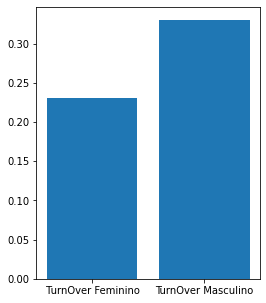

In [18]:
# Código da relação turnover por gênero
DF1 = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind1")
DF1.columns = [c.replace(' ', '_') for c in DF1.columns]

# Procura o gênero dos colaboradores que pediram demissão da empresa, representados por "Pedido de Demissão" na coluna "Tipo_Saida"
DF1_FIRED = DF1.loc[DF1["Tipo_Saida"] == "Pedido de Demissão"]
# Retira os espaços dos gêneros
DF1_FIRED["Genero"] = DF1_FIRED["Genero"].str.strip()

DF1["Tipo_Saida"].fillna(0, inplace=True)
# Procura o gênero dos colaboradores que ainda estão ativos na empresa, representados por "0" na coluna "Tipo_Saida"
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
# Retira os espaços dos gêneros
DF1_ACTIVE["Genero"] = DF1_ACTIVE["Genero"].str.strip()


# Converte a coluna "Genero" em uma lista e faz contagem de cada um que pediu demissão
DF1_FIRED_GENDER = DF1_FIRED['Genero'].to_numpy()
MascFired = 0
FemFired = 0
for i in DF1_FIRED_GENDER:
  if i == "Masculino":
    MascFired += 1
  if i == "Feminino":
    FemFired += 1
print(MascFired)
print(FemFired)


# Converte a coluna "Genero" em uma lista e faz contagem de cada um que ainda está na ativa
DF1_ACTIVE_GENDER = DF1_ACTIVE['Genero'].to_numpy()
MascActive = 0
FemActive = 0
for i in DF1_ACTIVE_GENDER:
  if i == "Masculino":
    MascActive += 1
  if i == "Feminino":
    FemActive += 1
print(MascActive)
print(FemActive)


# Faz a relação entre os homens que pediram demissão com o total
MascRel = MascFired/(MascFired+MascActive)
MascRel

# Faz a relação entre as mulheres que pediram demissão com o total
FemRel = FemFired/(FemFired+FemActive)
FemRel


import matplotlib.pyplot as plt
names = [" TurnOver Feminino", "TurnOver Masculino"]
values = [FemRel, MascRel]
plt.figure(figsize=(4,5))
plt.bar(names, values)
plt.show()

###Relação proporcional de tipo de saída e cargo
Relação entre os pedidos de demissão e seus respectivos cargos.


In [19]:
DF1 = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind1")
DF1.columns = [c.replace(' ', '_') for c in DF1.columns]
DF1_FIRED = DF1.loc[DF1["Tipo_Saida"] == "Pedido de Demissão"]
DF1_FIRED

,Matricula,Nome_Completo,Dt_Admissao,Dt_Saida,Tipo_Saida,Cargo,Salario_Mês,Dt_Nascimento,Genero,Etnia,Estado_Civil,Escolaridade_,Estado,Cidade,Area,Idade,Tempo_de_casa,Unnamed:_17,Unnamed:_18,Unnamed:_19
3,7.0,Pessoa Colaboradora 291,2015-09-01 00:00:00,2021-10-29 00:00:00,Pedido de Demissão,Arquiteto,7000.000,1986-08-31 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,36.0,2250,NaN,NaN,NaN
4,8.0,Pessoa Colaboradora 412,2015-12-07 00:00:00,2020-05-29 00:00:00,Pedido de Demissão,Dev Pl,2750.000,1994-06-27 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,CPG & Retail,28.0,1635,NaN,NaN,NaN
5,9.0,Pessoa Colaboradora 425,2015-12-07 00:00:00,2021-11-12 00:00:00,Pedido de Demissão,Arquiteto,6500.000,1988-07-07 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,34.0,2167,NaN,NaN,NaN
6,13.0,Pessoa Colaboradora 417,2016-12-05 00:00:00,2021-06-11 00:00:00,Pedido de Demissão,Arquiteto,5000.000,1992-08-05 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias,30.0,1649,NaN,NaN,NaN
7,14.0,Pessoa Colaboradora 393,2016-12-05 00:00:00,2020-10-30 00:00:00,Pedido de Demissão,Dev Pl,2068.600,1996-11-17 00:00:00,Masculino,Parda,Solteiro,Graduação,SP,Guarulhos,CPG & Retail,25.0,1425,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,336.0,Pessoa Colaboradora 350,2021-11-08 00:00:00,2022-02-09 00:00:00,Pedido de Demissão,Dev Especialista,6101.600,1980-12-13 00:00:00,Masculino,Não Informada,Solteiro,Graduação,SC,Florianópolis,CPG & Retail,41.0,295,NaN,NaN,NaN
287,341.0,Pessoa Colaboradora 319,2021-11-16 00:00:00,2022-07-08 00:00:00,Pedido de Demissão,Gerente,5593.135,1979-09-02 00:00:00,Masculino,Não Informada,Casado,Graduação,SP,Barueri,AMS,43.0,287,NaN,NaN,NaN
292,346.0,Pessoa Colaboradora 329,2021-12-01 00:00:00,2022-04-01 00:00:00,Pedido de Demissão,Gerente,6302.915,1979-09-18 00:00:00,Masculino,Não Informada,Casado,Graduação,SP,São Paulo,Analytics,42.0,121,NaN,NaN,NaN
298,352.0,Pessoa Colaboradora 338,2021-12-08 00:00:00,2022-07-01 00:00:00,Pedido de Demissão,Dev Jr,2269.050,1998-08-22 00:00:00,Masculino,Não Informada,Solteiro,Superior incompleto,RJ,Rio de Janeiro,Analytics,24.0,205,NaN,NaN,NaN


## Teste

In [20]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_ARQ = DF1_ACTIVE.loc[DF1["Cargo"] == "Arquiteto"]
DF1_FIRED_ARQ = DF1_FIRED.loc[DF1["Cargo"] == "Arquiteto"]
AtivosArq= DF1_ACTIVE_ARQ['Cargo'].count()
DemitidosArq= (DF1_FIRED_ARQ['Cargo'].count())
RelArq= DemitidosArq/(AtivosArq + DemitidosArq)
RelArq

0.5

In [21]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_DEVPL= DF1_ACTIVE.loc[DF1["Cargo"] == " Dev Pl"]
DF1_FIRED_DEVPL = DF1_FIRED.loc[DF1["Cargo"] == " Dev Pl"]
AtivosDev= DF1_ACTIVE_DEVPL['Cargo'].count()
DemitidosDev= (DF1_FIRED_DEVPL['Cargo'].count())
RelDev= DemitidosDev/(AtivosDev + DemitidosDev)
RelDev

0.5614035087719298

In [22]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_DEVSR= DF1_ACTIVE.loc[DF1["Cargo"] == " Dev Sr"]
DF1_FIRED_DEVSR = DF1_FIRED.loc[DF1["Cargo"] == " Dev Sr"]
AtivosDevSr= DF1_ACTIVE_DEVSR['Cargo'].count()
DemitidosDevSr= (DF1_FIRED_DEVSR['Cargo'].count())
RelDevSr= DemitidosDevSr/(AtivosDevSr + DemitidosDevSr)
RelDevSr

0.4

In [23]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_DEVESP= DF1_ACTIVE.loc[DF1["Cargo"] == " Dev Especialista"]
DF1_FIRED_DEVESP = DF1_FIRED.loc[DF1["Cargo"] == " Dev Especialista"]
AtivosDevEsp= DF1_ACTIVE_DEVESP['Cargo'].count()
DemitidosDevEsp = (DF1_FIRED_DEVESP['Cargo'].count())
RelDevEsp= DemitidosDevEsp/(AtivosDevEsp + DemitidosDevEsp)
RelDevEsp

0.42857142857142855

In [24]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_DIR= DF1_ACTIVE.loc[DF1["Cargo"] == " Diretor"]
DF1_FIRED_DIR = DF1_FIRED.loc[DF1["Cargo"] == " Diretor"]
AtivosDir= DF1_ACTIVE_DIR['Cargo'].count()
DemitidosDir= (DF1_FIRED_DIR['Cargo'].count())
RelDir= DemitidosDir/(AtivosDir + DemitidosDir)
RelDir

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [25]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_GER= DF1_ACTIVE.loc[DF1["Cargo"] == " Gerente Sr"]
DF1_FIRED_GER = DF1_FIRED.loc[DF1["Cargo"] == " Gerente Sr"]
AtivosGer= DF1_ACTIVE_GER['Cargo'].count()
DemitidosGer= (DF1_FIRED_GER['Cargo'].count())
RelGer= DemitidosGer/(AtivosGer + DemitidosGer)
RelGer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [26]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_FUNC= DF1_ACTIVE.loc[DF1["Cargo"] == " Funcional Pl"]
DF1_FIRED_FUNC = DF1_FIRED.loc[DF1["Cargo"] == " Funcional Pl"]
AtivosFunc= DF1_ACTIVE_FUNC['Cargo'].count()
DemitidosFunc= (DF1_FIRED_FUNC['Cargo'].count())
RelFunc= DemitidosFunc/(AtivosFunc + DemitidosFunc)
RelFunc

0.3684210526315789

In [27]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_FUNCSR= DF1_ACTIVE.loc[DF1["Cargo"] == " Funcional Sr"]
DF1_FIRED_FUNCSR = DF1_FIRED.loc[DF1["Cargo"] == " Funcional Sr"]
AtivosFuncSR= DF1_ACTIVE_FUNCSR['Cargo'].count()
DemitidosFuncSR= (DF1_FIRED_FUNCSR['Cargo'].count())
RelFuncSR= DemitidosFuncSR/(AtivosFuncSR + DemitidosFuncSR)
RelFuncSR

0.42857142857142855

In [28]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_Consultor= DF1_ACTIVE.loc[DF1["Cargo"] == " Consultor"]
DF1_FIRED_Consultor = DF1_FIRED.loc[DF1["Cargo"] == " Consultor"]
AtivosConsultor= DF1_ACTIVE_Consultor['Cargo'].count()
DemitidosConsultor= (DF1_FIRED_Consultor['Cargo'].count())
RelConsultor= DemitidosConsultor/(AtivosConsultor + DemitidosConsultor)
RelConsultor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [29]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_DEVJR= DF1_ACTIVE.loc[DF1["Cargo"] == " Dev Jr"]
DF1_FIRED_DEVJR = DF1_FIRED.loc[DF1["Cargo"] == " Dev Jr"]
AtivosDevJR= DF1_ACTIVE_DEVJR['Cargo'].count()
DemitidosDevJr= (DF1_FIRED_DEVJR['Cargo'].count())
RelDevJr= DemitidosDevJr/(AtivosDevJR + DemitidosDevJr)
RelDevJr

0.40384615384615385

In [30]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_SCRUMJR= DF1_ACTIVE.loc[DF1["Cargo"] == " Scrum Master Jr"]
DF1_FIRED_SCRUMJR = DF1_FIRED.loc[DF1["Cargo"] == " Scrum Master Jr"]
AtivosScrumJr= DF1_ACTIVE_SCRUMJR['Cargo'].count()
DemitidosScrumJr= (DF1_FIRED_SCRUMJR['Cargo'].count())
RelScrumJr= DemitidosScrumJr/(AtivosScrumJr + DemitidosScrumJr)
RelScrumJr

0.6666666666666666

In [31]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_GERENTE= DF1_ACTIVE.loc[DF1["Cargo"] == " Gerente"]
DF1_FIRED_GERENTE = DF1_FIRED.loc[DF1["Cargo"] == " Gerente"]
AtivosGerente= DF1_ACTIVE_GERENTE['Cargo'].count()
DemitidosGerente= (DF1_FIRED_GERENTE['Cargo'].count())
RelGerente= DemitidosGerente/(AtivosGerente + DemitidosGerente)
RelGerente

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [32]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_FUNCJR= DF1_ACTIVE.loc[DF1["Cargo"] == " Funcional Jr"]
DF1_FIRED_FUNCJR = DF1_FIRED.loc[DF1["Cargo"] == " Funcional Jr"]
AtivosFuncJr= DF1_ACTIVE_FUNCJR['Cargo'].count()
DemitidosFuncJr= (DF1_FIRED_FUNCJR['Cargo'].count())
RelFuncJr= DemitidosFuncJr/(AtivosFuncJr + DemitidosFuncJr)
RelFuncJr

0.47619047619047616

In [33]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_TRAINEEDEV= DF1_ACTIVE.loc[DF1["Cargo"] == " Trainee - Dev"]
DF1_FIRED_TRAINEEDEV = DF1_FIRED.loc[DF1["Cargo"] == " Trainee - Dev"]
AtivosTraineeDev= DF1_ACTIVE_TRAINEEDEV['Cargo'].count()
DemitidosTraineeDev= (DF1_FIRED_TRAINEEDEV['Cargo'].count())
RelTraineeDev= DemitidosTraineeDev/(AtivosTraineeDev + DemitidosTraineeDev)
RelTraineeDev

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [34]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_GERENTEPV= DF1_ACTIVE.loc[DF1["Cargo"] == " Gerente PV"]
DF1_FIRED_GERENTEPV = DF1_FIRED.loc[DF1["Cargo"] == " Gerente PV"]
AtivosGerentePV= DF1_ACTIVE_GERENTEPV['Cargo'].count()
DemitidosGerentePV= (DF1_FIRED_GERENTEPV['Cargo'].count())
RelGerentePV= DemitidosGerentePV/(AtivosGerentePV + DemitidosGerentePV)
RelGerentePV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [35]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_ASSII= DF1_ACTIVE.loc[DF1["Cargo"] == " Assistente II"]
DF1_FIRED_ASSII = DF1_FIRED.loc[DF1["Cargo"] == " Assistente II"]
AtivosAssistenteII= DF1_ACTIVE_ASSII['Cargo'].count()
DemitidosAssistenteII= (DF1_FIRED_ASSII['Cargo'].count())
RelAssistenteII= DemitidosAssistenteII/(AtivosAssistenteII + DemitidosAssistenteII)
RelAssistenteII

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [36]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_GERENTEVENDASI= DF1_ACTIVE.loc[DF1["Cargo"] == " Gente Vendas I"]
DF1_FIRED_GERENTEVENDASI = DF1_FIRED.loc[DF1["Cargo"] == " Gerente Vendas I"]
AtivosGerenteVendasI= DF1_ACTIVE_GERENTEVENDASI['Cargo'].count()
DemitidosGerenteVendasI = (DF1_FIRED_GERENTEVENDASI['Cargo'].count())
RelGerVenI= DemitidosGerenteVendasI/(AtivosGerenteVendasI + DemitidosGerenteVendasI)
RelGerVenI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [37]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_FUNCESP= DF1_ACTIVE.loc[DF1["Cargo"] == " Funcional Especialista"]
DF1_FIRED_FUNCESP = DF1_FIRED.loc[DF1["Cargo"] == " Funcional Especialista"]
AtivosFuncESP= DF1_ACTIVE_FUNCESP['Cargo'].count()
DemitidosFuncESP= (DF1_FIRED_FUNCESP['Cargo'].count())
RelFuncESP= DemitidosFuncESP/(AtivosFuncESP + DemitidosFuncESP)
RelFuncESP

0.3333333333333333

In [38]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_TESTESR= DF1_ACTIVE.loc[DF1["Cargo"] == " Teste Sr"]
DF1_FIRED_TESTESR = DF1_FIRED.loc[DF1["Cargo"] == " Teste Sr"]
AtivosTester= DF1_ACTIVE_TESTESR['Cargo'].count()
DemitidosTester= (DF1_FIRED_TESTESR['Cargo'].count())
RelTesteSr= DemitidosTester/(AtivosTester + DemitidosTester)
RelTesteSr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [39]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_COMERCIALIS= DF1_ACTIVE.loc[DF1["Cargo"] == " Comercial IS"]
DF1_FIRED_COMERCIALIS = DF1_FIRED.loc[DF1["Cargo"] == " Comercial IS"]
AtivosComercialIS= DF1_ACTIVE_COMERCIALIS['Cargo'].count()
DemitidosComercialIS= (DF1_FIRED_COMERCIALIS['Cargo'].count())
RelComercialIS= DemitidosComercialIS/(AtivosComercialIS + DemitidosComercialIS)
RelComercialIS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [40]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_GERENTEVENDASII= DF1_ACTIVE.loc[DF1["Cargo"] == " Gente Vendas II"]
DF1_FIRED_GERENTEVENDASII = DF1_FIRED.loc[DF1["Cargo"] == " Gerente Vendas II"]
AtivosGerenteVendasII= DF1_ACTIVE_GERENTEVENDASII['Cargo'].count()
DemitidosGerenteVendasII= (DF1_FIRED_GERENTEVENDASII['Cargo'].count())
RelGerVendII= DemitidosGerenteVendasII/(AtivosGerenteVendasII + DemitidosGerenteVendasII)
RelGerVendII

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [41]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_VICEPRES= DF1_ACTIVE.loc[DF1["Cargo"] == " Vice Presidente"]
DF1_FIRED_VICEPRES = DF1_FIRED.loc[DF1["Cargo"] == " Vice Presidente"]
AtivosVicePres= DF1_ACTIVE_VICEPRES['Cargo'].count()
DemitidosVicePres= (DF1_FIRED_VICEPRES['Cargo'].count())
RelVicePres= DemitidosVicePres/(AtivosVicePres + DemitidosVicePres)
RelVicePres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [42]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_GERENTECS= DF1_ACTIVE.loc[DF1["Cargo"] == " Gente CS Sr"]
DF1_FIRED_GERENTECS = DF1_FIRED.loc[DF1["Cargo"] == " Gerente CS Sr"]
AtivosGerenteCS= DF1_ACTIVE_GERENTECS['Cargo'].count()
DemitidosGerenteCS= (DF1_FIRED_GERENTECS['Cargo'].count())
RelGerenteCS= DemitidosGerenteCS/(AtivosGerenteCS + DemitidosGerenteCS)
RelGerenteCS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [43]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_LIMPEZA= DF1_ACTIVE.loc[DF1["Cargo"] == " Auxiliar de Limpeza"]
DF1_FIRED_LIMPEZA = DF1_FIRED.loc[DF1["Cargo"] == " Auxiliar de Limpeza"]
AtivosLimpeza= DF1_ACTIVE_LIMPEZA['Cargo'].count()
DemitidosLimpeza= (DF1_FIRED_LIMPEZA['Cargo'].count())
RelLimpeza= DemitidosLimpeza/(AtivosLimpeza + DemitidosLimpeza)
RelLimpeza

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [44]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_GERENTEVENDASIII= DF1_ACTIVE.loc[DF1["Cargo"] == " Gente Vendas III"]
DF1_FIRED_GERENTEVENDASIII = DF1_FIRED.loc[DF1["Cargo"] == " Gerente Vendas III"]
AtivosGERENTEVENDASIII= DF1_ACTIVE_GERENTEVENDASIII['Cargo'].count()
DemitidosGERENTEVENDASIII= (DF1_FIRED_GERENTEVENDASIII['Cargo'].count())
RelGERENTEVENDASIII= DemitidosGERENTEVENDASIII/(AtivosGERENTEVENDASIII + DemitidosGERENTEVENDASIII)
RelGERENTEVENDASIII

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [45]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_PESSOASPL= DF1_ACTIVE.loc[DF1["Cargo"] == " Pessoas Pl"]
DF1_FIRED_PESSOASPL = DF1_FIRED.loc[DF1["Cargo"] == " Pessoas Pl"]
AtivosPessoasPL= DF1_ACTIVE_PESSOASPL['Cargo'].count()
DemitidosPessoasPL= (DF1_FIRED_PESSOASPL['Cargo'].count())
RelPessoasPL= DemitidosPessoasPL/(AtivosPessoasPL + DemitidosPessoasPL)
RelPessoasPL

0.0

In [46]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_TRAINEEFUNC= DF1_ACTIVE.loc[DF1["Cargo"] == " Trainee - Funcional"]
DF1_FIRED_TRAINEEFUNC = DF1_FIRED.loc[DF1["Cargo"] == " Trainee - Funcional"]
AtivosTraineefunc= DF1_ACTIVE_TRAINEEFUNC['Cargo'].count()
DemitidosTraineefunc= (DF1_FIRED_TRAINEEFUNC['Cargo'].count())
RelTraineefunc = DemitidosTraineefunc/(AtivosTraineefunc + DemitidosTraineefunc)
RelTraineefunc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [47]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_ARQSR= DF1_ACTIVE.loc[DF1["Cargo"] == " Arquiteto Sr"]
DF1_FIRED_ARQSR = DF1_FIRED.loc[DF1["Cargo"] == " Arquiteto Sr"]
AtivosArqSr= DF1_ACTIVE_ARQSR['Cargo'].count()
DemitidosArqSr= (DF1_FIRED_ARQSR['Cargo'].count())
RelArqSr= DemitidosArqSr/(AtivosArqSr + DemitidosArqSr)
RelArqSr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [48]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_FINANJR= DF1_ACTIVE.loc[DF1["Cargo"] == " Financeiro Jr"]
DF1_FIRED_FINANJR = DF1_FIRED.loc[DF1["Cargo"] == " Financeiro Jr"]
AtivosFinanJr= DF1_ACTIVE_FINANJR['Cargo'].count()
DemitidosFinanJr= (DF1_FIRED_FINANJR['Cargo'].count())
RelFinanJr= DemitidosFinanJr/(AtivosFinanJr + DemitidosFinanJr)
RelFinanJr

0.0

In [49]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_COMERCIALPL= DF1_ACTIVE.loc[DF1["Cargo"] == " Comercial Pl"]
DF1_FIRED_COMERCIALPL = DF1_FIRED.loc[DF1["Cargo"] == " Comercial Pl"]
AtivosComercialPL= DF1_ACTIVE_COMERCIALPL['Cargo'].count()
DemitidosComercialPL= (DF1_FIRED_COMERCIALPL['Cargo'].count())
RelComercialPL= DemitidosComercialPL/(AtivosComercialPL/DemitidosComercialPL)
RelComercialPL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in long_scalars



0.0

In [50]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_EDUCPL= DF1_ACTIVE.loc[DF1["Cargo"] == "Educação Pl"]
DF1_FIRED_EDUCPL = DF1_FIRED.loc[DF1["Cargo"] == " Educação Pl"]
AtivosEducPL = DF1_ACTIVE_EDUCPL['Cargo'].count()
DemitidosEduPL = (DF1_FIRED_EDUCPL['Cargo'].count())
RelEducPL = DemitidosEduPL/(AtivosEducPL + DemitidosEduPL)
RelEducPL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [51]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_MARKPL = DF1_ACTIVE.loc[DF1["Cargo"] == " Marketing PL"]
DF1_FIRED_MARKPL = DF1_FIRED.loc[DF1["Cargo"] == " Marketing PL"]
AtivosMarketingPL = DF1_ACTIVE_MARKPL['Cargo'].count()
DemitidosMarketingPL = (DF1_FIRED_MARKPL['Cargo'].count())
RelMarketingPL = DemitidosMarketingPL/(AtivosMarketingPL + DemitidosMarketingPL)
RelMarketingPL

0.0

In [52]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_TESTEJR = DF1_ACTIVE.loc[DF1["Cargo"] == " Teste Jr"]
DF1_FIRED_TESTEJR = DF1_FIRED.loc[DF1["Cargo"] == " Teste Jr"]
AtivosTesteJr = DF1_ACTIVE_TESTEJR['Cargo'].count()
DemitidosTesteJr = (DF1_FIRED_TESTEJR['Cargo'].count())
RelTesteJr = DemitidosTesteJr/(AtivosTesteJr + DemitidosTesteJr)
RelTesteJr

0.0

In [53]:
DF1["Tipo_Saida"].fillna(0, inplace=True)
DF1_ACTIVE = DF1.loc[DF1["Tipo_Saida"] == 0]
DF1_ACTIVE_ASSISI= DF1_ACTIVE.loc[DF1["Cargo"] == " Assistente I"]
DF1_FIRED_ASSISI = DF1_FIRED.loc[DF1["Cargo"] == " Assistente I"]
AtivosAssisI= DF1_ACTIVE_ASSISI['Cargo'].count()
DemitidosAssisI= (DF1_ACTIVE_ASSISI['Cargo'].count())
RelAssisI= DemitidosAssisI/ (AtivosAssisI + DemitidosAssisI)
RelAssisI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in long_scalars



nan

In [54]:
import math

if math.isnan(RelAssisI):
  RelAssisI = 0
if math.isnan(RelTesteJr):
  RelTesteJr= 0
RelMarketingPL
if math.isnan(RelEducPL):
  RelEducPL = 0
RelComercialPL
RelFinanJr
if math.isnan(RelArqSr):
  RelArqSr = 0
if math.isnan(RelTraineefunc):
  RelTraineefunc = 0
RelPessoasPL
if math.isnan(RelGERENTEVENDASIII):
  RelGERENTEVENDASIII = 0
if math.isnan(RelLimpeza):
  RelLimpeza = 0
if math.isnan(RelGerenteCS):
  RelGerenteCS = 0
if math.isnan(RelVicePres):
  RelVicePres = 0
if math.isnan(RelGerVendII):
  RelGerVendII = 0
if math.isnan(RelComercialIS):
  RelComercialIS = 0
if math.isnan(RelTesteSr):
  RelTesteSr = 0
RelFuncESP
if math.isnan(RelGerVenI):
  RelGerVenI = 0
if math.isnan(RelAssistenteII):
  RelAssistenteII = 0
if math.isnan(RelGerentePV):
  RelGerentePV = 0
if math.isnan(RelTraineeDev):
  RelTraineeDev = 0
RelFuncJr
if math.isnan(RelGerente):
  RelGerente = 0
RelScrumJr
RelDevJr
if math.isnan(RelConsultor):
  RelConsultor = 0
RelFuncSR
RelFunc
if math.isnan(RelGer):
  RelGer = 0
if math.isnan(RelDir):
  RelDir = 0

RelDevEsp
RelArq
RelDev
RelDevSr

0.4

## Graphs


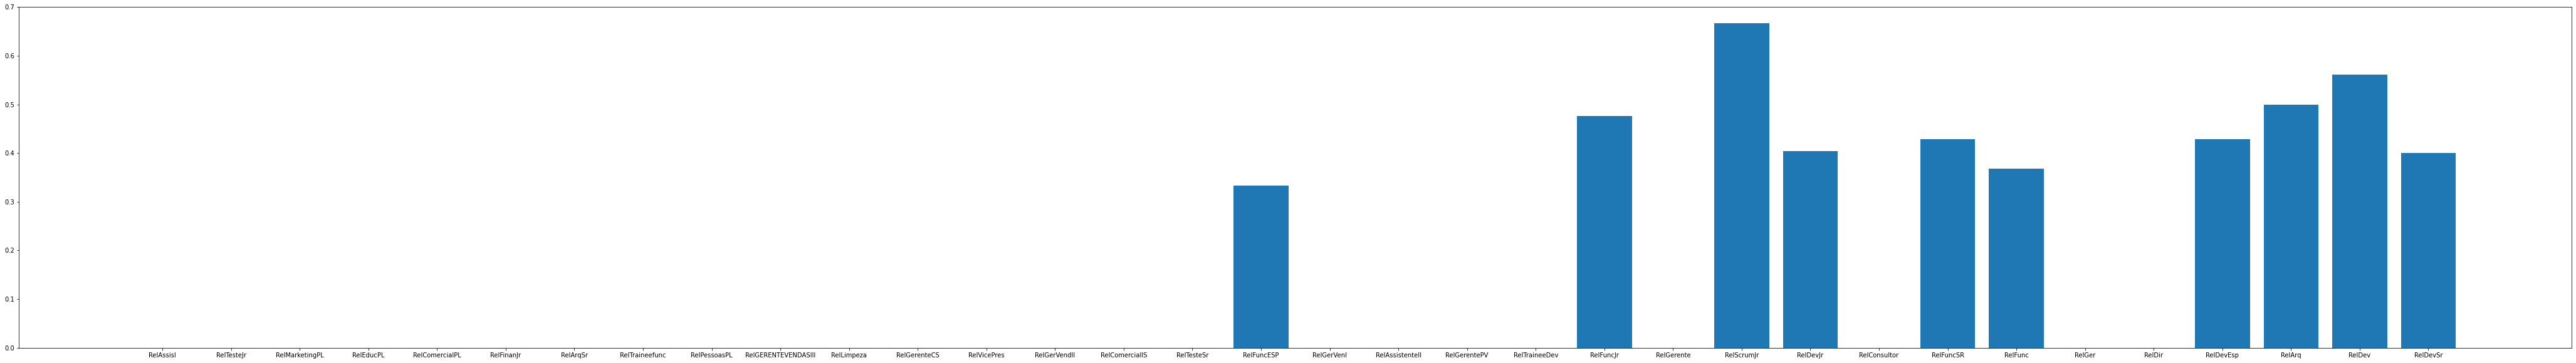

In [55]:
import matplotlib.pyplot as plt
names = [
  'RelAssisI',
  'RelTesteJr',
  'RelMarketingPL',
  'RelEducPL',
  'RelComercialPL',
  'RelFinanJr',
  'RelArqSr',
  'RelTraineefunc',
  'RelPessoasPL',
  'RelGERENTEVENDASIII',
  'RelLimpeza',
  'RelGerenteCS',
  'RelVicePres',
  'RelGerVendII', 
  'RelComercialIS',
  'RelTesteSr',
  'RelFuncESP',
  'RelGerVenI',
  'RelAssistenteII',
  'RelGerentePV',
  'RelTraineeDev',
  'RelFuncJr',
  'RelGerente',
  'RelScrumJr',
  'RelDevJr',
  'RelConsultor',
  'RelFuncSR',
  'RelFunc',
  'RelGer',
  'RelDir',
  'RelDevEsp',
  'RelArq',
  'RelDev',
  'RelDevSr'
]

values = [
    RelAssisI,
  RelTesteJr,
  RelMarketingPL,
  RelEducPL,
  RelComercialPL,
  RelFinanJr,
  RelArqSr,
  RelTraineefunc,
  RelPessoasPL,
  RelGERENTEVENDASIII,
  RelLimpeza,
  RelGerenteCS,
  RelVicePres,
  RelGerVendII,
  RelComercialIS,
  RelTesteSr,
  RelFuncESP,
  RelGerVenI,
  RelAssistenteII,
  RelGerentePV,
  RelTraineeDev,
  RelFuncJr,
  RelGerente,
  RelScrumJr,
  RelDevJr,
  RelConsultor,
  RelFuncSR,
  RelFunc,
  RelGer,
  RelDir,
  RelDevEsp,
  RelArq,
  RelDev,
  RelDevSr
]

plt.figure(figsize=(73,10))
plt.bar(names, values)

plt.show()

In [56]:
base

,Matricula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,3 Meses >,6 Meses >,9 Meses >,12 Meses >,Tempo de casa
0,2.0,2015-02-02,NaT,4,Gerente Sr,9914.4,1992-01-25,Masculino,3,2,SP,São Paulo,CPG & Retail,30,0,0,0,0,NaN
1,3.0,2015-03-26,NaT,4,Gerente Sr,8250.0,1991-08-03,Masculino,3,2,SP,Osasco,CPG & Retail,31,0,0,0,0,NaN
2,4.0,2015-04-05,NaT,4,Arquiteto Sr,9914.4,1988-03-05,Masculino,3,2,SP,São Paulo,Education,34,0,0,0,1,NaN
3,7.0,2015-09-01,2021-10-29,1,Arquiteto,7000.0,1986-08-31,Masculino,3,2,SP,São Paulo,Core & Industrias,36,0,0,0,1,2250.0
4,8.0,2015-12-07,2020-05-29,1,Dev Pl,2750.0,1994-06-27,Masculino,3,2,SP,São Paulo,CPG & Retail,28,0,0,0,2,1635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,526.0,2022-07-18,2022-07-25,3,Dev Jr,1500.0,1993-07-15,Feminino,3,4,PR,Colombo,Integration,29,0,0,0,0,7.0
471,527.0,2022-07-18,NaT,4,Arquiteto,7000.0,1981-08-16,Masculino,0,5,SP,Guarulhos,Mkt Cloud,41,0,0,0,0,NaN
472,528.0,2022-07-18,NaT,4,Dev Jr,1750.0,1991-12-05,Masculino,3,4,DF,Brasília,Integration,30,0,0,0,0,NaN
473,529.0,2022-07-18,NaT,4,Dev Pl,2750.0,1990-01-18,Masculino,3,5,MG,Unaí,Commerce,32,0,0,0,0,NaN


In [58]:
base.columns

Index(['Matricula', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cargo',
       'Salario Mês', 'Dt Nascimento', 'Genero', 'Estado Civil',
       'Escolaridade ', 'Estado', 'Cidade', 'Area', 'Idade', '3 Meses >',
       '6 Meses >', '9 Meses >', '12 Meses >', 'Tempo de casa'],
      dtype='object')

In [59]:
base_sem_nan = base[['Tempo de casa', 'Idade', 'Tipo Saida']].dropna()

In [60]:
# base_sem_nan[['Tempo de casa', 'Idade']]
base_sem_nan['Tipo Saida']

3      1
4      1
5      1
6      1
7      1
      ..
399    3
409    3
418    3
433    3
470    3
Name: Tipo Saida, Length: 191, dtype: int64

In [61]:
import sklearn
from sklearn.model_selection import train_test_split

# Dividindo x e y
x = base_sem_nan[['Tempo de casa', 'Idade']]
y = base_sem_nan['Tipo Saida']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-random
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(133, 2)
(133,)
(58, 2)
(58,)


In [62]:
from sklearn.preprocessing import MinMaxScaler

# Instaciando o objeto scaler
scaler = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_train[['Tempo de casa', 'Idade']] = scaler.fit_transform(x_train[['Tempo de casa', 'Idade']])

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_test[['Tempo de casa', 'Idade']] = scaler.transform(x_test[['Tempo de casa', 'Idade']])

### Percentual de acurácia do modelo

É estabelecido pela biblioteca sklearn com importação de uma ferramenta

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=7)
# Treino # x = Features, y = Label/Target
knn.fit(x_train, y_train.squeeze()) # squeeze() -> df para series

KNeighborsClassifier(n_neighbors=7)

In [64]:
# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', knn.score( x_train, y_train ))
print('Acuracidade (teste): ', knn.score( x_test, y_test ))

Acuracidade (treino):  0.6842105263157895
Acuracidade (teste):  0.6379310344827587


### KNN - k-Nearest-Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=7)
# Treino # x = Features, y = Label/Target
knn.fit( x_train, y_train.squeeze() ) # squeeze() -> df para series

KNeighborsClassifier(n_neighbors=7)

In [66]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1])

In [67]:
y_prob = knn.predict_proba(x_test)
y_prob

array([[0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.42857143, 0.28571429, 0.28571429],
       [0.14285714, 0.28571429, 0.        , 0.57142857],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.85714286, 0.        , 0.14285714],
       [0.        , 0.71428571, 0.        , 0.28571429],
       [0.        , 1.        , 0.        , 0.        ],
       [0.57142857, 0.42857143, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.57142857, 0.28571429, 0.14285714],
       [0.14285714, 0.85714286, 0.        , 0.        ],
       [0.14285714, 0.14285714, 0.14285714, 0.57142857],
       [0.        , 1.        , 0.        , 0.        ],
       [0.28571429, 0.14285714, 0.14285714, 0.42857143],
       [0.        , 0.85714286,

In [68]:
from sklearn.metrics import confusion_matrix

y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 1, 10,  0,  2],
       [ 4, 34,  0,  0],
       [ 0,  1,  0,  1],
       [ 0,  3,  0,  2]])

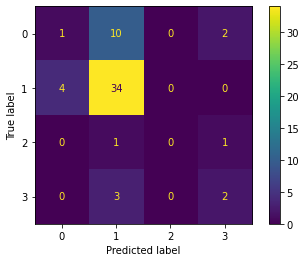

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#Visualização da matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

# Naive Bayes

In [77]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(x_train, y_train).predict(x_test)


Number of mislabeled points out of a total 58 points : 15


# Decision Tree

In [70]:
from sklearn import tree

baseCopy = base[['Tempo de casa', 'Idade', 'Tipo Saida']].dropna()
X, y = baseCopy[['Tempo de casa', 'Idade']], baseCopy['Tipo Saida'].values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

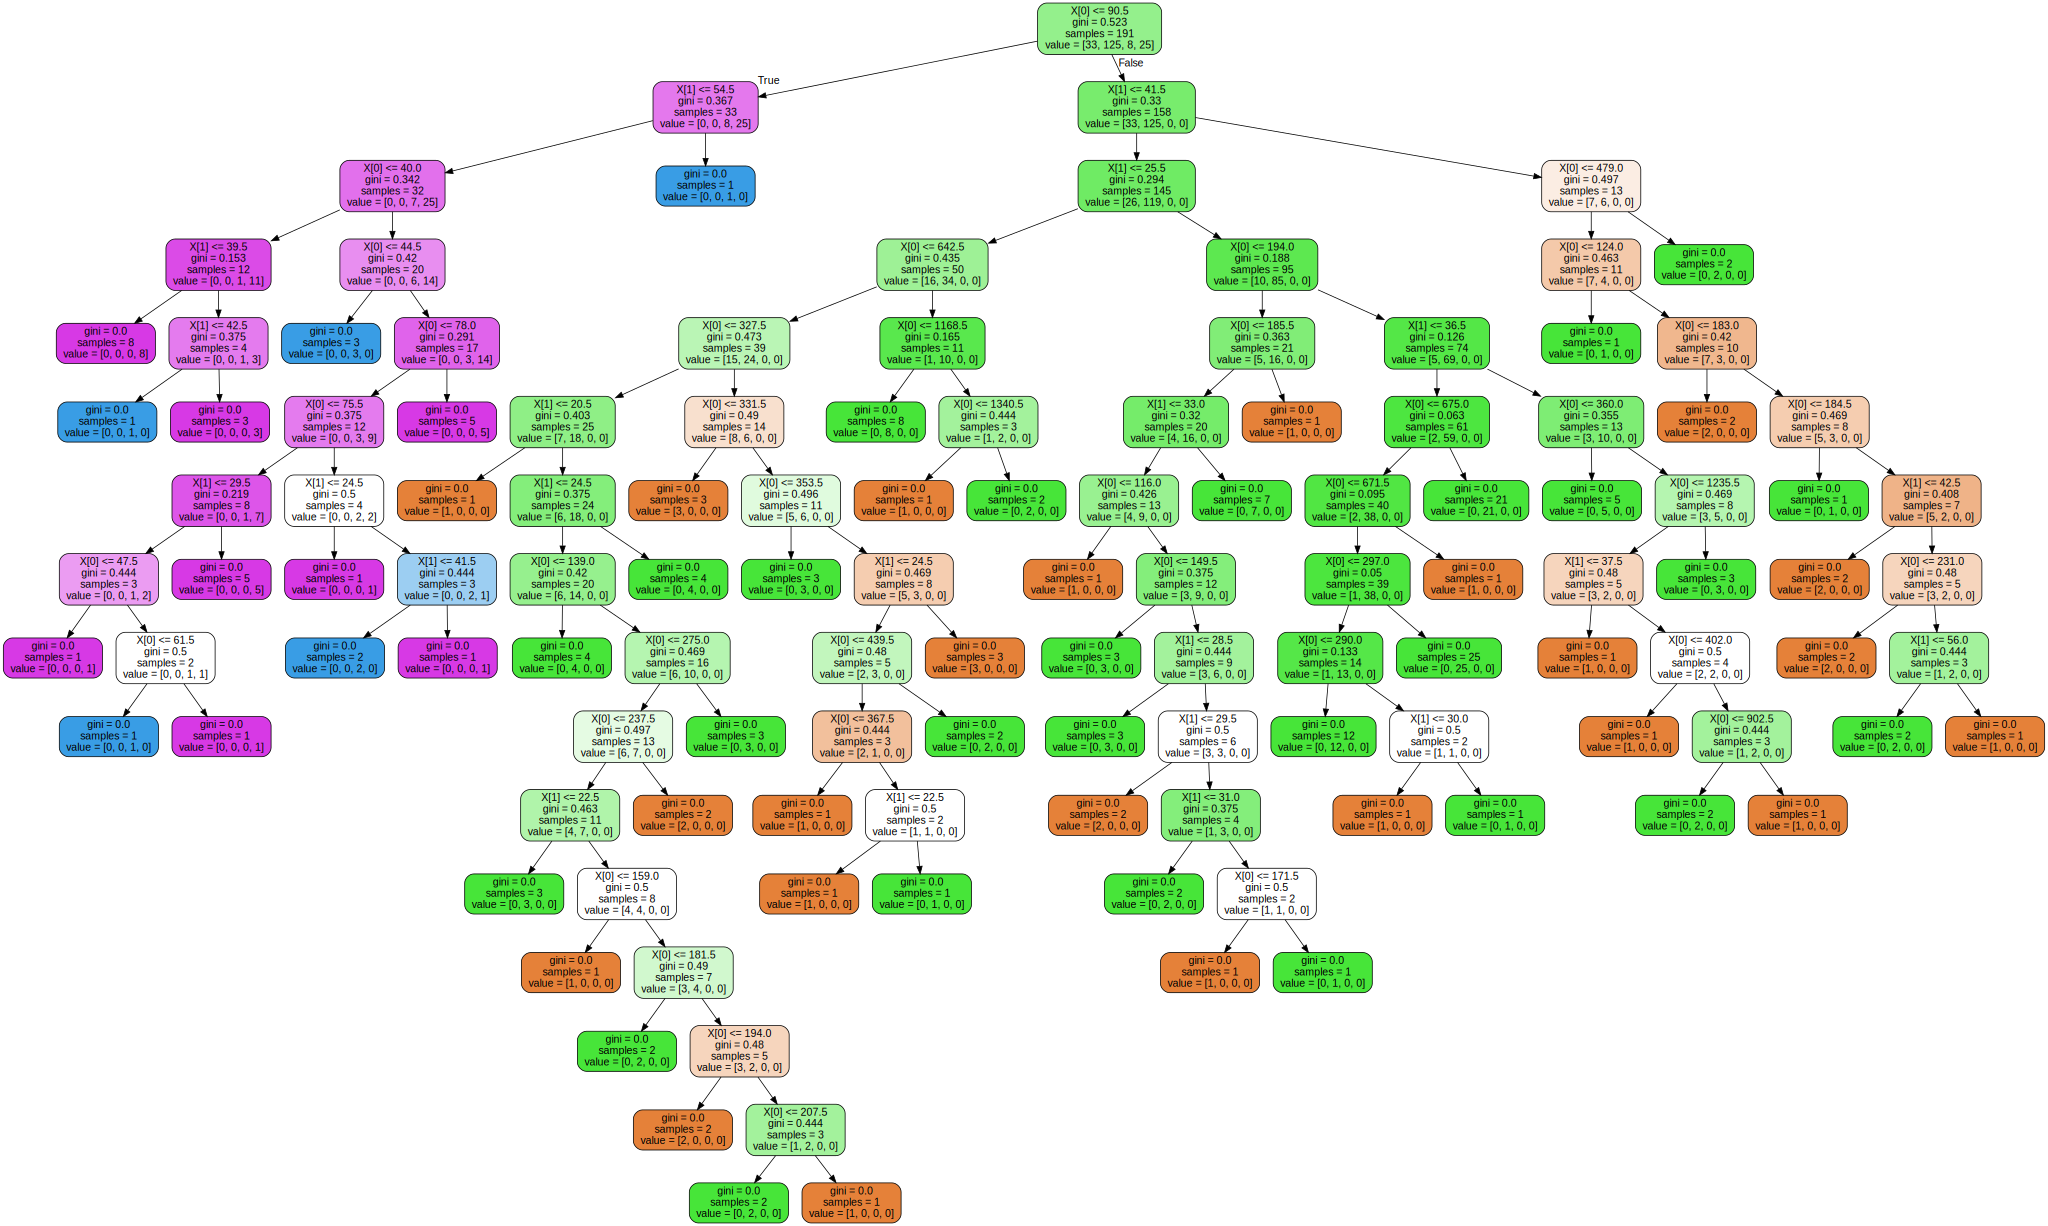

In [71]:
import graphviz

dot_data = tree.export_graphviz(clf, filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

In [73]:
y_pred = clf.predict(X)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


[[ 33   0   0   0]
 [  0 125   0   0]
 [  0   0   8   0]
 [  0   0   0  25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       125
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        25

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

